In [1]:
import sys,os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.metoc import read_metbuoy_SBD
from wgpack.config import DATAPATH,RDRPATH


In [2]:
# read-in WXT data (all files)
LOCALdir = os.path.join(DATAPATH,'mmbSBD')

# List local WXT file names
fnames_local=[]
for root, dirs, files in os.walk(LOCALdir):
    for filename in files:
        if not filename[0] == '.':
            fnames_local.append(filename)

# Read-in WXT mets
path_local = os.path.join(LOCALdir,fnames_local[0])
WXTdf = read_metbuoy_SBD(path_local)
for f in fnames_local[1:]:
    path_local = os.path.join(LOCALdir,f)
    WXTdf = pd.concat([WXTdf, read_metbuoy(path_local)])
# sort by date
WXTdf.sort_index(inplace=True)
WXTdf

,latitude,longitude,wspdE,wspdN,wspd_min,wspd_max,WindSpeed,WindSpeed10,WindDirection,pressure_SL,pressure_baro,temperature,RelativeHumidity,cog,sog
Date,,,,,,,,,,,,,,,
2022-12-08 06:05:09,7.55559,134.43408,-4.218441,0.000000,2.777998,6.276217,4.218441,5.144440,89.7,NaN,1003.793724,28.3,78.9,338.0,0.514444
2022-12-08 06:15:35,7.55844,134.43304,-4.578552,0.205778,3.086664,6.224772,4.578552,5.607440,92.4,NaN,1003.793724,28.3,79.2,338.0,0.514444
2022-12-08 06:26:31,7.56108,134.43196,-4.012663,-0.720222,2.675109,6.121884,4.115552,4.990107,80.8,NaN,1003.692132,28.2,80.8,338.0,0.514444
2022-12-08 06:37:01,7.56380,134.43091,-5.916106,-1.903443,3.806886,9.877325,6.224772,7.562327,72.2,NaN,1003.793724,27.3,88.2,340.0,0.514444
2022-12-08 06:47:27,7.56629,134.42989,-4.990107,-1.491888,2.983775,6.893550,5.195884,6.327661,72.7,NaN,1003.793724,27.2,87.2,339.0,0.514444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 00:07:57,6.96339,134.01553,-5.607440,-3.086664,3.806886,9.414325,6.379106,7.819549,61.2,1007.32,1007.315569,28.5,84.5,359.0,0.514444
2022-12-16 00:18:21,6.96424,134.01273,-6.121884,-3.806886,4.218441,9.980214,7.202216,8.796992,57.8,1007.42,1007.417161,28.6,82.6,284.0,0.617333
2022-12-16 00:29:15,6.96217,134.01010,-6.121884,-3.703997,4.321330,10.906213,7.099327,8.642659,58.3,1007.42,1007.417161,28.6,84.2,226.0,0.617333


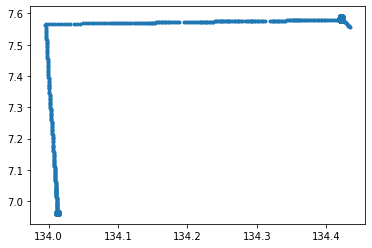

In [3]:
import matplotlib.pyplot as plt
plt.plot(WXTdf['longitude'],WXTdf['latitude'],'.')
